In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [3]:
data = pd.read_csv('us-states.csv')

In [4]:
dense = {
    'Alabama' : 95,
    'Alaska' : 1,
    'American Samoa' : 721,
    'Arizona' : 60,
    'Arkansas' : 57,
    'California' : 251,
    'Colorado' : 52,
    'Connecticut' : 741,
    'Delaware' : 485,
    'District of Columbia' : 11011,
    'Florida' : 378,
    'Georgia' : 177,
    'Guam' : 808,
    'Hawaii' : 222,
    'Idaho' : 20,
    'Illinois' : 231,
    'Indiana' : 184,
    'Iowa' : 55,
    'Kansas' : 36,
    'Kentucky' : 112,
    'Louisiana' : 108,
    'Maine' : 43,
    'Maryland' : 618,
    'Massachusetts' : 871,
    'Michigan' : 175,
    'Minnesota' : 68,
    'Mississippi' : 63,
    'Missouri' : 88,
    'Montana' : 7,
    'Nebraska' : 24,
    'Nevada' : 26,
    'New Hampshire' : 148,
    'New Jersey' : 1218,
    'New Mexico' : 17,
    'New York' : 420,
    'North Carolina' : 206,
    'North Dakota' : 10,
    'Northern Mariana Islands' : 307,
    'Ohio' : 284,
    'Oklahoma' : 57,
    'Oregon' : 41,
    'Pennsylvania' : 286,
    'Puerto Rico' : 1046,
    'Rhode Island' : 1021,
    'South Carolina' : 162,
    'South Dakota' : 11,
    'Tennessee' : 160,
    'Texas' : 105,
    'Utah' : 36,
    'Vermont' : 67,
    'Virgin Islands' : 799,
    'Virginia' : 212,
    'Washington' : 107,
    'West Virginia' : 76,
    'Wisconsin' : 106,
    'Wyoming' : 6
}

age = {
    'Alabama' : 39.2,
    'Alaska' : 34.6,
    'American Samoa' : 25.5,
    'Arizona' : 37.9,
    'Arkansas' : 38.3,
    'California' : 36.8,
    'Colorado' : 36.9,
    'Connecticut' : 41.0,
    'Delaware' : 40.7,
    'District of Columbia' : 34.0,
    'Florida' : 42.2,
    'Georgia' : 36.9,
    'Guam' : 29.0,
    'Hawaii' : 39.2,
    'Idaho' : 36.6,
    'Illinois' : 38.3,
    'Indiana' : 37.9,
    'Iowa' : 38.2,
    'Kansas' : 36.9,
    'Kentucky' : 38.9,
    'Louisiana' : 37.2,
    'Maine' : 44.9,
    'Maryland' : 38.8,
    'Massachusetts' : 39.4,
    'Michigan' : 39.8,
    'Minnesota' : 38.1,
    'Mississippi' : 37.7,
    'Missouri' : 38.7,
    'Montana' : 39.9,
    'Nebraska' : 36.6,
    'Nevada' : 38.1,
    'New Hampshire' : 43.0,
    'New Jersey' : 40.0,
    'New Mexico' : 38.1,
    'New York' : 39.0,
    'North Carolina' : 38.9,
    'North Dakota' : 35.2,
    'Northern Mariana Islands' : 33.6,
    'Ohio' : 39.4,
    'Oklahoma' : 36.7,
    'Oregon' : 39.4,
    'Pennsylvania' : 40.8,
    'Puerto Rico' : 41.5,
    'Rhode Island' : 40.1,
    'South Carolina' : 39.6,
    'South Dakota' : 37.1,
    'Tennessee' : 38.8,
    'Texas' : 34.8,
    'Utah' : 31.0,
    'Vermont' : 42.8,
    'Virgin Islands' : 41.0,
    'Virginia' : 38.4,
    'Washington' : 37.7,
    'West Virginia' : 42.7,
    'Wisconsin' : 39.6,
    'Wyoming' : 38.0
}

gdpPerCap = {
    'Alabama' : 45219,
    'Alaska' : 73205,
    'American Samoa' : 11467,
    'Arizona' : 48055,
    'Arkansas' : 42454,
    'California' : 74205,
    'Colorado' : 63882,
    'Connecticut' : 76342,
    'Delaware' : 77253,
    'District of Columbia' : 200277,
    'Florida' : 48318,
    'Georgia' : 55832,
    'Guam' : 35713,
    'Hawaii' : 64096,
    'Idaho' : 43430,
    'Illinois' : 67268,
    'Indiana' : 55172,
    'Iowa' : 59977,
    'Kansas' : 56334,
    'Kentucky' : 36898,
    'Louisiana' : 53589,
    'Maine' : 47969,
    'Maryland' : 68573,
    'Massachusetts' : 82480,
    'Michigan' : 53209,
    'Minnesota' : 64675,
    'Mississippi' : 37948,
    'Missouri' : 51699,
    'Montana' : 46609,
    'Nebraska' : 63942,
    'Nevada' : 55269,
    'New Hampshire' : 63067,
    'New Jersey' : 69378,
    'New Mexico' : 46954,
    'New York' : 85746,
    'North Carolina' : 54441,
    'North Dakota' : 72597,
    'Northern Mariana Islands' : 23259,
    'Ohio' : 57492,
    'Oklahoma' : 50613,
    'Oregon' : 56956,
    'Pennsylvania' : 61594,
    'Puerto Rico' : 31651,
    'Rhode Island' : 57852,
    'South Carolina' : 45280,
    'South Dakota' : 58624,
    'Tennessee' : 53933,
    'Texas' : 61167,
    'Utah' : 55550,
    'Vermont' : 53523,
    'Virgin Islands' : 35938,
    'Virginia' : 62563,
    'Washington' : 74182,
    'West Virginia' : 43053,
    'Wisconsin' : 57720,
    'Wyoming' : 69900
}

cityDense = {
    'Alabama' : 1452,
    'Alaska' : 175,
    'American Samoa' : 721,
    'Arizona' : 3120,
    'Arkansas' : 1673,
    'California' : 8484,
    'Colorado' : 4521,
    'Connecticut' : 9064,
    'Delaware' : 485,
    'District of Columbia' : 11011,
    'Florida' : 12599,
    'Georgia' : 3539,
    'Guam' : 808,
    'Hawaii' : 5815,
    'Idaho' : 2718,
    'Illinois' : 11900,
    'Indiana' : 2366,
    'Iowa' : 2424,
    'Kansas' : 2431,
    'Kentucky' : 2339,
    'Louisiana' : 2311,
    'Maine' : 43,
    'Maryland' : 7598,
    'Massachusetts' : 13938,
    'Michigan' : 4847,
    'Minnesota' : 7660,
    'Mississippi' : 1524,
    'Missouri' : 1528,
    'Montana' : 2525,
    'Nebraska' : 3356,
    'Nevada' : 4709,
    'New Hampshire' : 3339,
    'New Jersey' : 11691,
    'New Mexico' : 2972,
    'New York' : 28317,
    'North Carolina' : 2757,
    'North Dakota' : 2450,
    'Northern Mariana Islands' : 307,
    'Ohio' : 3936,
    'Oklahoma' : 1053,
    'Oregon' : 4793,
    'Pennsylvania' : 11683,
    'Puerto Rico' : 1046,
    'Rhode Island' : 9740,
    'South Carolina' : 1233,
    'South Dakota' : 2312,
    'Tennessee' : 1388,
    'Texas' : 3613,
    'Utah' : 1742,
    'Vermont' : 67,
    'Virgin Islands' : 799,
    'Virginia' : 1850,
    'Washington' : 8405,
    'West Virginia' : 76,
    'Wisconsin' : 106,
    'Wyoming' : 6
}

In [5]:
def seriesCreator(dataDict):
    seriesDict = pd.Series(dataDict)
    dataList = []
    for x in range (0, 2889):
        dataList.append(seriesDict[data['state'].iloc[x]])
    return pd.Series(dataList)

In [6]:
denseSeries = seriesCreator(dense)
ageSeries = seriesCreator(age)
#gdpSeries = seriesCreator(gdpPerCap)
citySeries = seriesCreator(cityDense)

In [7]:
def seriesConcat(series):
    return pd.concat([data, series.reindex(data.index)], axis = 1)

In [8]:
data = seriesConcat(denseSeries)
data = seriesConcat(ageSeries)
#data = seriesConcat(gdpSeries)
data = seriesConcat(citySeries)

In [9]:
data.columns = ['date', 'state', 'fips', 'cases', 'deaths', 'pop_density', 'avg_age', 'city_density']

In [10]:
data

,date,state,fips,cases,deaths,pop_density,avg_age,city_density
0,2020-01-21,Washington,53,1,0,107,37.7,8405
1,2020-01-22,Washington,53,1,0,107,37.7,8405
2,2020-01-23,Washington,53,1,0,107,37.7,8405
3,2020-01-24,Illinois,17,1,0,231,38.3,11900
4,2020-01-24,Washington,53,1,0,107,37.7,8405
...,...,...,...,...,...,...,...,...
2884,2020-04-23,Virginia,51,11000,375,212,38.4,1850
2885,2020-04-23,Washington,53,12906,717,107,37.7,8405
2886,2020-04-23,West Virginia,54,981,31,76,42.7,76
2887,2020-04-23,Wisconsin,55,5052,257,106,39.6,106


In [11]:
data.head()

,date,state,fips,cases,deaths,pop_density,avg_age,city_density
0,2020-01-21,Washington,53,1,0,107,37.7,8405
1,2020-01-22,Washington,53,1,0,107,37.7,8405
2,2020-01-23,Washington,53,1,0,107,37.7,8405
3,2020-01-24,Illinois,17,1,0,231,38.3,11900
4,2020-01-24,Washington,53,1,0,107,37.7,8405


In [13]:
data.shape

(2889, 8)

In [11]:
import datetime as dt 

In [12]:
#label encoder for dates
def scrub_date(date1):
    date_parts = date1.split('-')
    f_date = dt.date(int(date_parts[0]), int(date_parts[1]), int(date_parts[2]))
    delta = f_date - dt.date(2020, 1, 21)
    return delta.days

for i in range(len(data['date'])):
    data['date'][i] = scrub_date(data['date'][i])

/home/justin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [13]:
#label encoder for state
id = 1
state_dict = {}
for i in range(len(data['state'])):
    state = data['state'][i]
    if state not in state_dict:
        state_dict[state] = id
        id += 1
        data['state'][i] = state_dict[state]
    else:
        data['state'][i] = state_dict[state]
        

/home/justin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/justin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [18]:
len(data.index)

2889

In [21]:
copy = data.copy()

In [22]:
copy

,date,state,fips,cases,deaths,pop_density,avg_age,city_density
0,0,1,53,1,0,107,37.7,8405
1,1,1,53,1,0,107,37.7,8405
2,2,1,53,1,0,107,37.7,8405
3,3,2,17,1,0,231,38.3,11900
4,3,1,53,1,0,107,37.7,8405
...,...,...,...,...,...,...,...,...
2884,93,33,51,11000,375,212,38.4,1850
2885,93,1,53,12906,717,107,37.7,8405
2886,93,54,54,981,31,76,42.7,76
2887,93,6,55,5052,257,106,39.6,106


In [20]:
data

,date,state,fips,cases,deaths,pop_density,avg_age,city_density
0,0,1,53,1,0,107,37.7,8405
1,1,1,53,1,0,107,37.7,8405
2,2,1,53,1,0,107,37.7,8405
3,3,2,17,1,0,231,38.3,11900
4,3,1,53,1,0,107,37.7,8405
...,...,...,...,...,...,...,...,...
2884,93,33,51,11000,375,212,38.4,1850
2885,93,1,53,12906,717,107,37.7,8405
2886,93,54,54,981,31,76,42.7,76
2887,93,6,55,5052,257,106,39.6,106


In [18]:
cont_vars = ['pop_density', 'avg_age', 'city_density']

for var in cont_vars:
    for i in range(len(copy[var])):
        copy[var][i] = (copy[var][i] - copy[var].mean())/copy[var].std()

/home/justin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [23]:
data = data.drop('fips', axis = 1)

In [24]:
y = data.cases
X = data.drop('cases', axis = 1)

In [25]:
data

,date,state,cases,deaths,pop_density,avg_age,city_density
0,0,1,1,0,107,37.7,8405
1,1,1,1,0,107,37.7,8405
2,2,1,1,0,107,37.7,8405
3,3,2,1,0,231,38.3,11900
4,3,1,1,0,107,37.7,8405
...,...,...,...,...,...,...,...
2884,93,33,11000,375,212,38.4,1850
2885,93,1,12906,717,107,37.7,8405
2886,93,54,981,31,76,42.7,76
2887,93,6,5052,257,106,39.6,106


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y)

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
model = RandomForestRegressor(n_estimators = 100, random_state = 1)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [35]:
preds = model.predict(X_valid)

In [36]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_valid, preds)

In [37]:
mae

538.2244260027662

In [24]:
data.describe()

,cases,deaths,pop_density,avg_age,city_density
count,2889.000000,2889.00000,2889.000000,2889.000000,2889.000000
mean,4734.918311,190.28972,420.761855,38.263621,4861.097958
std,18762.852274,967.45956,1407.884868,2.755086,5094.242578
min,0.000000,0.00000,1.000000,25.500000,6.000000
25%,19.000000,0.00000,55.000000,36.900000,1524.000000
50%,365.000000,6.00000,108.000000,38.300000,2972.000000
75%,2331.000000,63.00000,284.000000,39.600000,7660.000000
max,263460.000000,15740.00000,11011.000000,44.900000,28317.000000


In [25]:
import tensorflow_probability as tfp

tfd = tfp.distributions

In [26]:
train_dataset = data.sample(frac = 0.8, random_state = 0)
test_dataset = data.drop(train_dataset.index)

In [19]:
len(train_dataset.keys())

7

In [34]:
test_dataset

,date,state,deaths,pop_density,avg_age,city_density
0,0,1,0,107,37.7,8405
3,3,2,0,231,38.3,11900
7,4,1,0,107,37.7,8405
21,8,3,0,251,36.8,8484
24,9,4,0,60,37.9,3120
...,...,...,...,...,...,...
2861,93,50,14,7,39.9,2525
2864,93,15,51,148,43.0,3339
2869,93,44,15,10,35.2,2450
2871,93,37,656,284,39.4,3936


In [27]:
train_labels = train_dataset.pop('cases')
test_labels = test_dataset.pop('cases')

In [28]:
def build_tf_model():
    model = keras.Sequential([
        layers.Dense(64, activation = 'relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation = 'relu'),
        layers.Dense(64, activation = 'relu'),
        tfp.layers.DistributionLambda(lambda t: tfd.Normal(loc=t, scale=1)),
        layers.Dense(1)
    ])
    
    #optimizer = tf.keras.optimizers.RMSprop(0.001)
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
    
    model.compile(loss = 'mse', optimizer = optimizer, metrics = ['mae', 'mse'])
    
    return model 

tf_model = build_tf_model()

tf_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
distribution_lambda (Distrib ((None, 64), (None, 64))  0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 8,833
Trainable params: 8,833
Non-trainable params: 0
_________________________________________________________________


In [56]:
history = tf_model.fit(train_dataset, train_labels, validation_split = 0.2, epochs = 10, verbose = 1)

Train on 1848 samples, validate on 463 samples
Epoch 1/10
1848/1848 [==============================] - 0s 148us/sample - loss: 143892.5425 - mae: 174.7138 - mse: 143892.5312 - val_loss: 392347.6068 - val_mae: 266.4211 - val_mse: 392347.5625
Epoch 2/10
1848/1848 [==============================] - 0s 129us/sample - loss: 91844.6636 - mae: 160.1024 - mse: 91844.6719 - val_loss: 245619.8361 - val_mae: 213.7689 - val_mse: 245619.8594
Epoch 3/10
1848/1848 [==============================] - 0s 147us/sample - loss: 203870.4300 - mae: 169.2278 - mse: 203870.4531 - val_loss: 486928.3286 - val_mae: 370.0809 - val_mse: 486928.3438
Epoch 4/10
1848/1848 [==============================] - 0s 145us/sample - loss: 300894.8688 - mae: 271.5956 - mse: 300894.8125 - val_loss: 233923.4304 - val_mae: 222.4700 - val_mse: 233923.4375
Epoch 5/10
1848/1848 [==============================] - 0s 176us/sample - loss: 106497.3326 - mae: 169.1362 - mse: 106497.3359 - val_loss: 301232.0600 - val_mae: 208.8022 - val_ms

In [48]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.head()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
0,7.188245e+06,1300.999634,7188245.0,4.276776e+06,1042.753906,4276776.0,0
1,6.362835e+06,1206.556030,6362835.0,4.191301e+06,1050.195435,4191301.0,1
2,6.119808e+06,1089.225830,6119808.0,4.489317e+06,1089.936646,4489317.0,2
3,6.481090e+06,1187.504272,6481091.0,4.239275e+06,1047.449951,4239275.5,3
4,6.009096e+06,1100.776611,6009096.5,7.211904e+06,1643.431885,7211904.5,4


In [40]:
from matplotlib import pyplot as plt

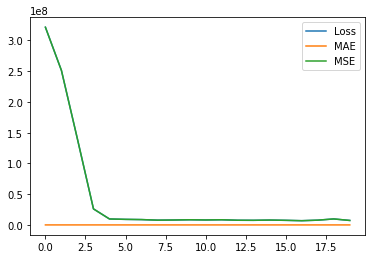

In [41]:
plt.figure()
plt.plot(hist['epoch'], hist['loss'], label = 'Loss')
plt.plot(hist['epoch'], hist['mae'], label = 'MAE')
plt.plot(hist['epoch'], hist['mse'], label = 'MSE')
plt.legend()

In [32]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std = 2)

Text(0, 0.5, 'MAE [Confirmed Cases]')

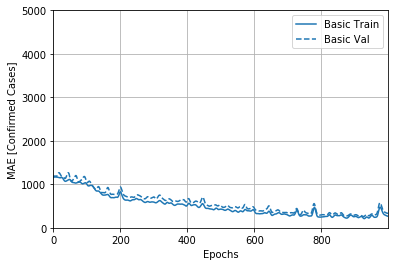

In [50]:
plotter.plot({'Basic': history}, metric = 'mae')
plt.ylim([0 , 5000])
plt.ylabel('MAE [Confirmed Cases]')

In [35]:
tf_model_2 = build_tf_model()

early_stop = keras.callbacks.EarlyStopping(monitor = 'mae', patience = 50)

early_history = tf_model_2.fit(train_dataset, train_labels, epochs = 1000, validation_split = 0.2, verbose = 0, callbacks = [early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:340579513.8095,  mae:5094.7866,  mse:340579488.0000,  val_loss:186907683.9352,  val_mae:5573.6035,  val_mse:186907696.0000,  
....................................................................................................
Epoch: 100, loss:3584695.2630,  mae:889.8871,  mse:3584695.7500,  val_loss:3999936.0421,  val_mae:897.3730,  val_mse:3999935.7500,  
....................................................................................................
Epoch: 200, loss:2103317.5123,  mae:648.3375,  mse:2103317.7500,  val_loss:2435591.1878,  val_mae:702.2189,  val_mse:2435591.0000,  
....................................................................................................
Epoch: 300, loss:1459831.1995,  mae:550.2641,  mse:1459830.8750,  val_loss:1717183.7073,  val_mae:589.4108,  val_mse:1717183.7500,  
....................................................................................................
Epoch: 400, loss:964068.6806,  mae:471.8638,  mse:96406

Text(0, 0.5, 'MAE [Confirmed Cases]')

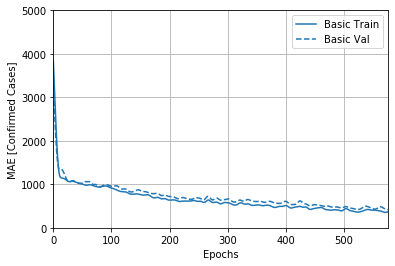

In [36]:
early_hist = pd.DataFrame(early_history.history)

plotter.plot({'Basic': early_history}, metric = 'mae')
plt.ylim([0, 5000])
plt.ylabel('MAE [Confirmed Cases]')

In [40]:
test_predictions = tf_model_2.predict(test_dataset)
test_predictions

array([[-2.21004028e+02],
       [-2.21398010e+02],
       [-2.37600708e+02],
       [-3.28500610e+02],
       [-1.42355469e+02],
       [-3.29372925e+02],
       [-1.89019348e+02],
       [-2.66869202e+02],
       [-1.13259644e+02],
       [-5.01416382e+02],
       [-1.58838684e+02],
       [-2.04795105e+02],
       [-4.78766724e+02],
       [-2.57266216e+01],
       [-1.21762939e+02],
       [-1.93002808e+02],
       [-1.53056021e+01],
       [-2.26468536e+02],
       [-2.13729279e+02],
       [-1.18791443e+02],
       [ 3.53520508e+01],
       [-9.83696289e+01],
       [-1.34947571e+02],
       [-6.29931030e+01],
       [ 5.62418823e+01],
       [-1.39882507e+02],
       [-4.03647522e+02],
       [-1.53841736e+02],
       [ 5.53837280e+01],
       [-1.32927673e+02],
       [ 6.56970825e+01],
       [-3.86259705e+02],
       [-4.49506836e+01],
       [-1.99598980e+01],
       [ 8.92791138e+01],
       [-1.01493164e+02],
       [-1.14564636e+02],
       [-1.03339050e+02],
       [-8.1

In [45]:
test_dataset

,date,state,deaths,pop_density,avg_age,city_density
0,0,1,0,107,37.7,8405
3,3,2,0,231,38.3,11900
7,4,1,0,107,37.7,8405
21,8,3,0,251,36.8,8484
24,9,4,0,60,37.9,3120
...,...,...,...,...,...,...
2861,93,50,14,7,39.9,2525
2864,93,15,51,148,43.0,3339
2869,93,44,15,10,35.2,2450
2871,93,37,656,284,39.4,3936


In [102]:
#today_data = [94, 3, 1619, 251, 36.8, 8484]
today_data = {'date': 94, 'state': 4, 'deaths': 268, 'pop_density': 251, 'ave_age':36.8, 'city_density':8484}
today = pd.DataFrame(today_data, index = [0])
today

,date,state,deaths,pop_density,ave_age,city_density
0,94,4,268,251,36.8,8484


In [54]:
tf_model_2.predict(today)

array([[36019.83]], dtype=float32)

In [80]:
def build_simple_model():
    model = keras.Sequential([
            layers.Dense(64, activation = 'relu', input_shape=[len(train_dataset.keys())]),
            layers.Dense(64, activation = 'relu'),
            layers.Dense(64, activation = 'relu'),
            layers.Dense(64, activation = 'relu'),
            layers.Dense(64, activation = 'relu'),
            layers.Dense(1)
        ])

    #optimizer = tf.keras.optimizers.RMSprop(0.001)
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

    model.compile(loss = 'mse', optimizer = optimizer, metrics = ['mae', 'mse'])

    return model 

simple_model = build_simple_model()

simple_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 64)                448       
_________________________________________________________________
dense_27 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_28 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_29 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_30 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 65        
Total params: 17,153
Trainable params: 17,153
Non-trainable params: 0
__________________________________________________

In [81]:
simple_early_stop = keras.callbacks.EarlyStopping(monitor = 'mae', patience = 40)

early_simple_history = simple_model.fit(train_dataset, train_labels, validation_split = 0.2, epochs = 1000, verbose = 0, callbacks = [simple_early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:305016091.4026,  mae:5571.2690,  mse:305016096.0000,  val_loss:165977419.0929,  val_mae:6987.0103,  val_mse:165977440.0000,  
....................................................................................................
Epoch: 100, loss:3822543.7880,  mae:816.6742,  mse:3822543.7500,  val_loss:4712919.2203,  val_mae:960.0496,  val_mse:4712919.0000,  
....................................................................................................
Epoch: 200, loss:1478544.6604,  mae:545.2838,  mse:1478544.6250,  val_loss:2061950.6671,  val_mae:635.6621,  val_mse:2061950.6250,  
....................................................................................................
Epoch: 300, loss:1268745.0104,  mae:450.3084,  mse:1268745.0000,  val_loss:1852849.5771,  val_mae:593.2537,  val_mse:1852849.7500,  
.............................................

In [28]:
plotter.plot({'Early Simple History': early_simple_history}, metric = 'mae')
plt.ylim([0, 5000])
plt.ylabel('MAE [Confirmed Cases]')

NameError: name 'plotter' is not defined

In [77]:
export_dir = "/tmp/test_saved_model"
tf.saved_model.save(simple_model, export_dir)

saved_model = tf.saved_model.load(export_dir)
concrete_func = saved_model.signatures[tf.saved_model.DEFAULT_SERVING_SIGNATURE_DEF_KEY]

INFO:tensorflow:Assets written to: /tmp/test_saved_model/assets


In [83]:
simple_model.predict(today)

array([[35885.035]], dtype=float32)

In [78]:
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
tflite_model = converter.convert()

In [79]:
open("earthxhack.tflite", "wb").write(tflite_model)

71552

In [96]:
def build_final_model():
    model = keras.Sequential([
        layers.Dense(64, activation = 'relu', input_shape = [len(train_dataset.keys())]),
        layers.Dropout(0.05),
        layers.Dense(32, activation = 'relu', kernel_regularizer=keras.regularizers.l2(l=0.1)),
        layers.Dense(64, activation = 'relu'),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

    model.compile(loss = 'mse', optimizer = optimizer, metrics = ['mae', 'mse'])

    return model 

f_model = build_final_model()
f_model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 64)                448       
_________________________________________________________________
dropout_15 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_58 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_59 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 65        
Total params: 4,705
Trainable params: 4,705
Non-trainable params: 0
_________________________________________________________________


In [97]:
final_early_stop = keras.callbacks.EarlyStopping(monitor = 'mae', patience = 20)

final_history = f_model.fit(train_dataset, train_labels, validation_split = 0.2, epochs = 1000, verbose = 0, callbacks = [final_early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:367510808.2900,  mae:4888.5938,  mse:367510752.0000,  val_loss:198515737.4147,  val_mae:4818.8994,  val_mse:198515728.0000,  
....................................................................................................
Epoch: 100, loss:5216980.1009,  mae:990.1796,  mse:5216967.5000,  val_loss:5342006.2181,  val_mae:1071.9753,  val_mse:5341993.0000,  
.......................................................................

In [31]:
final_plotter = tfdocs.plots.HistoryPlotter(smoothing_std = 10)

Text(0, 0.5, 'MAE [Confirmed Cases]')

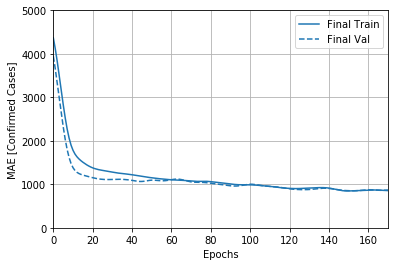

In [98]:
final_plotter.plot({'Final': final_history}, metric = 'mae')
plt.ylim([0, 5000])
plt.ylabel('MAE [Confirmed Cases]')

In [103]:
f_model.predict(today)

array([[6705.4185]], dtype=float32)

In [91]:
data.describe()

,cases,deaths,pop_density,avg_age,city_density
count,2889.000000,2889.00000,2889.000000,2889.000000,2889.000000
mean,4734.918311,190.28972,420.761855,38.263621,4861.097958
std,18762.852274,967.45956,1407.884868,2.755086,5094.242578
min,0.000000,0.00000,1.000000,25.500000,6.000000
25%,19.000000,0.00000,55.000000,36.900000,1524.000000
50%,365.000000,6.00000,108.000000,38.300000,2972.000000
75%,2331.000000,63.00000,284.000000,39.600000,7660.000000
max,263460.000000,15740.00000,11011.000000,44.900000,28317.000000


In [100]:
state_dict

{'Washington': 1,
 'Illinois': 2,
 'California': 3,
 'Arizona': 4,
 'Massachusetts': 5,
 'Wisconsin': 6,
 'Texas': 7,
 'Nebraska': 8,
 'Utah': 9,
 'Oregon': 10,
 'Florida': 11,
 'New York': 12,
 'Rhode Island': 13,
 'Georgia': 14,
 'New Hampshire': 15,
 'North Carolina': 16,
 'New Jersey': 17,
 'Colorado': 18,
 'Maryland': 19,
 'Nevada': 20,
 'Tennessee': 21,
 'Hawaii': 22,
 'Indiana': 23,
 'Kentucky': 24,
 'Minnesota': 25,
 'Oklahoma': 26,
 'Pennsylvania': 27,
 'South Carolina': 28,
 'District of Columbia': 29,
 'Kansas': 30,
 'Missouri': 31,
 'Vermont': 32,
 'Virginia': 33,
 'Connecticut': 34,
 'Iowa': 35,
 'Louisiana': 36,
 'Ohio': 37,
 'Michigan': 38,
 'South Dakota': 39,
 'Arkansas': 40,
 'Delaware': 41,
 'Mississippi': 42,
 'New Mexico': 43,
 'North Dakota': 44,
 'Wyoming': 45,
 'Alaska': 46,
 'Maine': 47,
 'Alabama': 48,
 'Idaho': 49,
 'Montana': 50,
 'Puerto Rico': 51,
 'Virgin Islands': 52,
 'Guam': 53,
 'West Virginia': 54,
 'Northern Mariana Islands': 55,
 'American Samoa': 